# Plotting and Visualization

## 1. A Brief matplotlib API Primer
- import matplotlib.pyplot as plt
- https://matplotlib.org/api/pyplot_summary.html

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = np.arange(10)

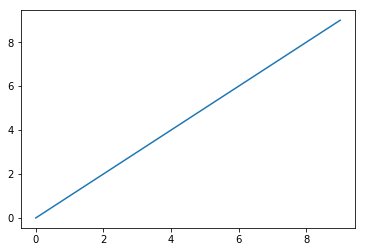

In [3]:
plt.plot(data)

### Figures and Subplots
- figure = plt.figure() : 그래프를 그리는 캔버스!
- ax = fig.add_subplot(행, 열, 순서)
- fig, axes = plt.subplots(행, 열)
- subplot 사이의 간격 조절 : plt.subplots_adjust(left, bottom, right, top, wspace, hspace)

In [4]:
import pandas as pd

In [5]:
fig = plt.figure() #그래프를 보여주기 위한 캔버스 라고 생각하자!

<Figure size 432x288 with 0 Axes>

In [6]:
ax1 = fig.add_subplot(2, 2, 1); #figure 안에 subplot 2행 2열 그래프 중 첫번째 AxesSubplot 객체
ax2 = fig.add_subplot(2, 2, 2);
ax3 = fig.add_subplot(2, 2, 3);

In [7]:
ax3.plot(np.random.randn(50).cumsum(), 'k--')

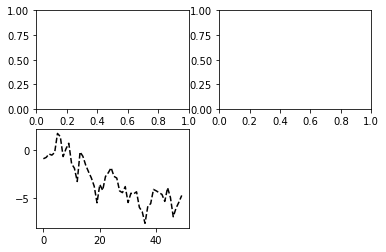

In [8]:
fig

In [9]:
_ = ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)

In [10]:
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

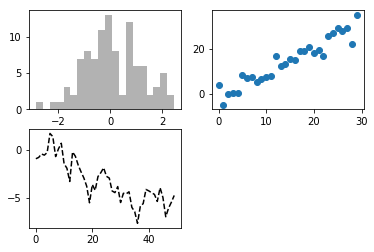

In [11]:
fig

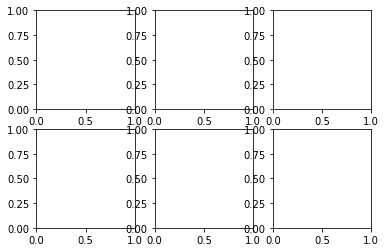

In [12]:
fig, axes = plt.subplots(2,3)

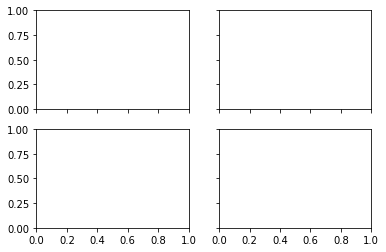

In [13]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
#sharex= / sharey= : subplot들이 다 같은 x 축 혹은 y 축을 가지는가?

In [14]:
for i in range(2):
    for j in range(2):
        axes[i,j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

<Figure size 432x288 with 0 Axes>

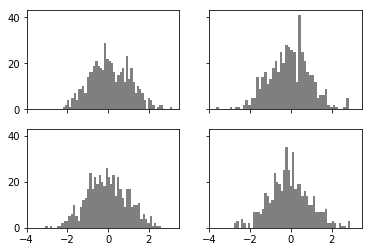

In [15]:
fig

### Colors, Markers, and Line Styles
- color= marker= linestyle= 옵션으로 각각 지정
- 한꺼번에 하려면 color-marker-linestyle 순으로 지정해야함
- label 옵션 : 그래프 이름 지정
- plt.legend(loc='best') : 범주 그리기, 기본값으로 가장 최적의 위치에 그려짐

In [16]:
from numpy.random import randn

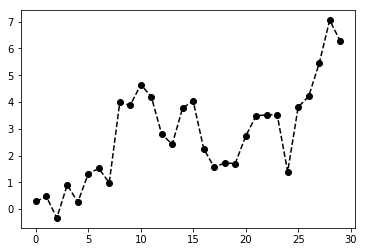

In [17]:
plt.plot(randn(30).cumsum(), 'ko--')

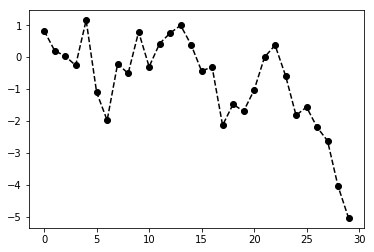

In [18]:
plt.plot(randn(30).cumsum(), color='k', linestyle='dashed', marker='o')

In [19]:
data = np.random.randn(30).cumsum()

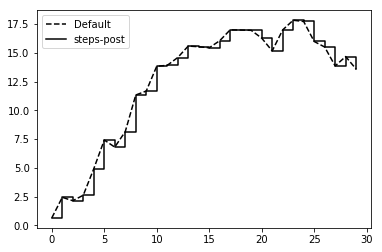

In [20]:
plt.plot(data, 'k--', label='Default');
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post');
plt.legend(loc='best')

### Ticks, Labels, and Legends

- ax.set_xticks([x 값 목록]) / ax.set_yticks([y값 목록])
- ax.set_xtickslabels([label 값 목록]) / ax.set_ytickslabels([label 값 목록])
- ax.set_xlim(['처음', '끝']) / ax.set_ylim(['처음', '끝'])
- ax.set_title('제목')
- ax.set_xlabel / ax.set_ylabel
- ax.legend(loc=) # legend 위치 paramter https://matplotlib.org/api/_as_gen/matplotlib.pyplot.legend.html

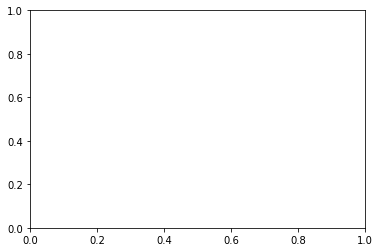

In [21]:
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)

In [22]:
ax.plot(randn(1000).cumsum())

In [23]:
ax.set_xticks([0, 250, 500, 750, 1000])

In [24]:
ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
....: rotation=30, fontsize='small')

[Text(0,0,'one'),
 Text(0.2,0,'two'),
 Text(0.4,0,'three'),
 Text(0.6,0,'four'),
 Text(0.8,0,'five')]

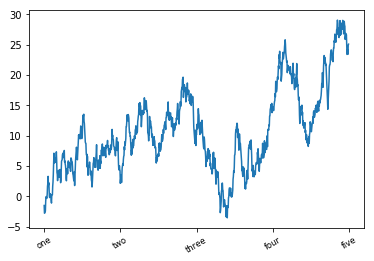

In [25]:
fig

In [26]:
ax.set_title('My first matplotlib plot')

Text(0.5,1,'My first matplotlib plot')

In [27]:
ax.set_xlabel('Stages')

Text(0.5,3.2,'Stages')

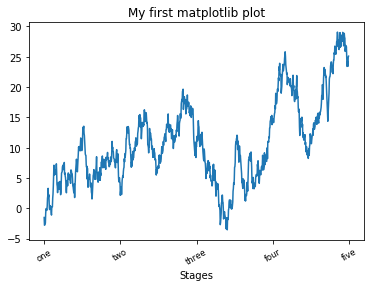

In [29]:
fig

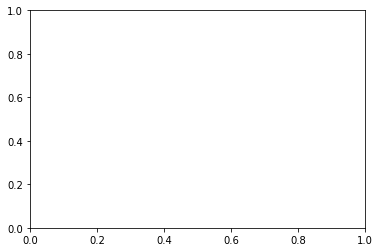

In [30]:
fig = plt.figure(); ax=fig.add_subplot(1, 1, 1)

In [31]:
ax.plot(randn(1000).cumsum(), 'k', label='one');
ax.plot(randn(1000).cumsum(), 'k--', label='two');
ax.plot(randn(1000).cumsum(), 'k.', label='three');
ax.legend(loc='best') #legend를 그래프를 가리지 않는 적절한 위치에 자동 배정

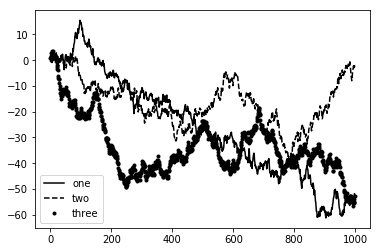

In [32]:
fig

### Annotations(주석) and Drawing on a Subplot

- ax.annotate('주석으로 쓸 내용', 지점의 xy 좌표, 주석의 위치 xy좌표, 화살표의 속성)
기타 옵션 : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.annotate.html

In [33]:
from datetime import datetime

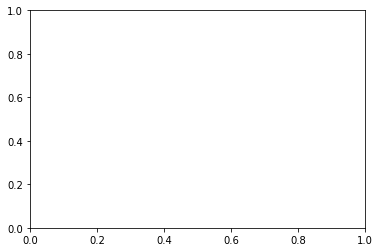

In [34]:
fig = plt.figure();
ax = fig.add_subplot(1, 1, 1)

In [35]:
data = pd.read_csv('examples/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']
spx.plot(ax=ax, style='k-') #subplot의 위치 지정, style 지정
crisis_data = [
 (datetime(2007, 10, 11), 'Peak of bull market'),
 (datetime(2008, 3, 12), 'Bear Stearns Fails'),
 (datetime(2008, 9, 15), 'Lehman Bankruptcy') # 주석을 넣을 데이터 지정
] #리스트 안에 튜플
for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75), # 주석 표시할 지점
 xytext=(date, spx.asof(date) + 225), # 주석 위치
 arrowprops=dict(facecolor='black', headwidth=4, width=2, headlength=4), # 화살표의 속성 
 horizontalalignment='left', verticalalignment='top')
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])
ax.set_title('Important dates in 2008-2009 financial crisis')

Text(0.5,1,'Important dates in 2008-2009 financial crisis')

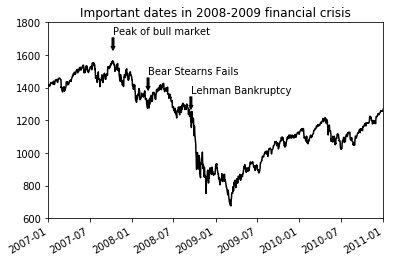

In [36]:
fig

### Saving Plots to File
- plt.savefig('figpath.png')

In [38]:
fig.savefig('figure.png', dpi=400, bbox_inches='tight')

## 2. Plotting with pandas and seaborn
> seaborn : Seaborn은 Matplotlib을 기반으로 다양한 색상 테마와 통계용 챠트 등의 기능을 추가한 시각화 패키지이다. 기본적인 시각화 기능은 Matplotlib 패키지에 의존하며 통계 기능은 Statsmodels 패키지에 의존한다.

- series.plot() / dataframe.plot() : plot 내장 메쏘드가 존재
- series.plot.graphstyle() 
- 옵션 : label, ax, style, alpha, kind, sticks, yticks, xlim, ylim, grid..
- https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html

### Line Plots

In [39]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))

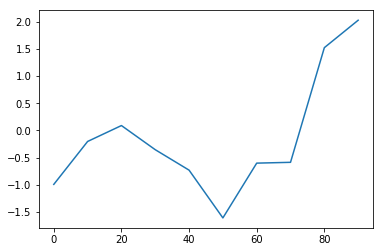

In [40]:
s.plot()

In [41]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
 ....: columns=['A', 'B', 'C', 'D'],
 ....: index=np.arange(0, 100, 10))

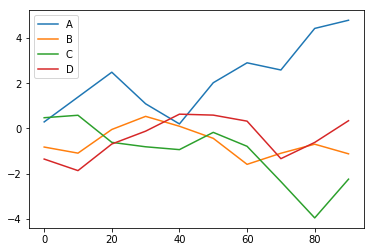

In [42]:
df.plot()

### Bar Plots
- pandas.plot.bar

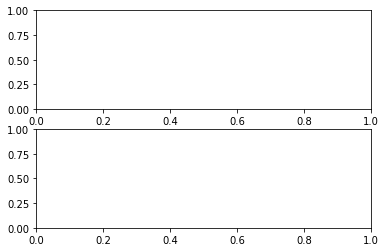

In [43]:
fig, axes = plt.subplots(2,1)

In [44]:
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))

In [45]:
data.plot.bar(ax=axes[0], color='k', alpha=0.7);
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

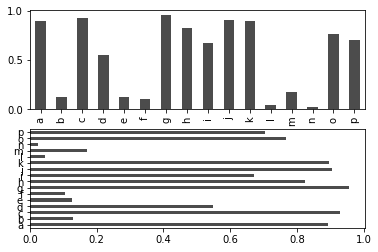

In [46]:
fig

In [47]:
df = pd.DataFrame(np.random.rand(6, 4),
 ....: index=['one', 'two', 'three', 'four', 'five', 'six'],
 ....: columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))

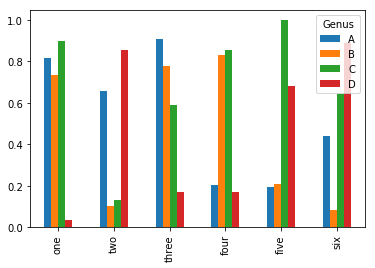

In [48]:
df.plot(kind='bar')

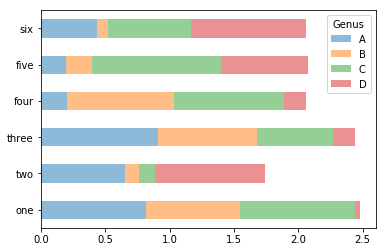

In [49]:
df.plot.barh(stacked=True, alpha=0.5) #stacked=True / 데이터를 쌓아서 그래프 보여주기

In [50]:
tips = pd.read_csv('examples/tips.csv')

In [51]:
party_counts = pd.crosstab(tips['day'], tips['size'])

In [52]:
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [53]:
party_counts = party_counts.loc[:, 2:5] #첫번째 사람과 6번째 사람 제외

In [54]:
party_pcts = party_counts.div(party_counts.sum(1), axis=0)
#party_counts를 party_counts의 행 기준의 합으로 나누기

In [55]:
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


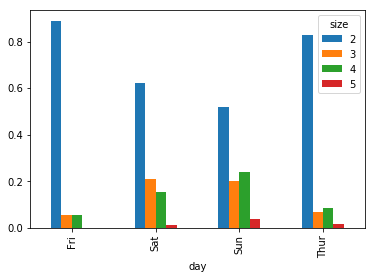

In [56]:
party_pcts.plot.bar()

In [57]:
import seaborn as sns

In [58]:
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])

In [59]:
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


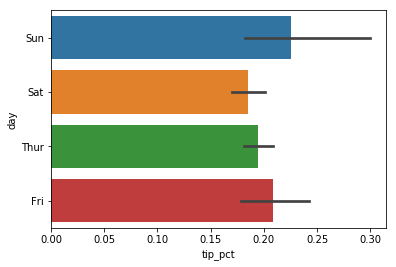

In [60]:
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

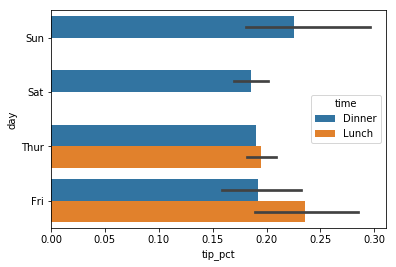

In [61]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')
#hue : 범주

### Histograms and Density Plots

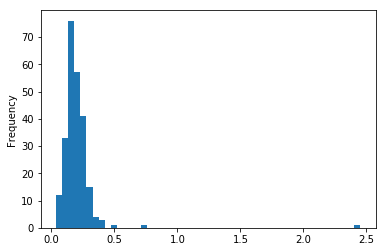

In [62]:
tips['tip_pct'].plot.hist(bins=50)

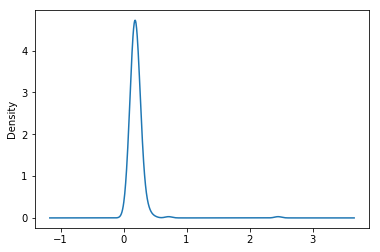

In [63]:
tips['tip_pct'].plot.density()

In [64]:
comp1 = np.random.normal(0, 1, size=200)

In [65]:
comp2 = np.random.normal(10, 2, size=200)

In [66]:
values = pd.Series(np.concatenate([comp1, comp2]))

C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


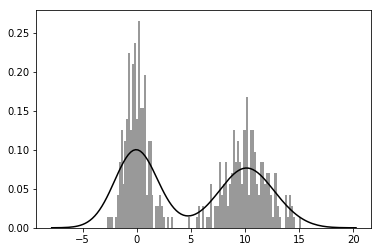

In [67]:
sns.distplot(values, bins=100, color='k')

### Scatter or Point Plots

In [68]:
macro = pd.read_csv('examples/macrodata.csv')

In [69]:
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']] #한꺼번에 데이터 불러오기

In [70]:
trans_data = np.log(data).diff().dropna() #뒤의 데이터에서 앞의 데이터 빼기

In [71]:
trans_data[-5:] #뒤에서 5번째 데이터부터 끝까지

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


Text(0.5,1,'Changes in log m1 vs. log unemp')

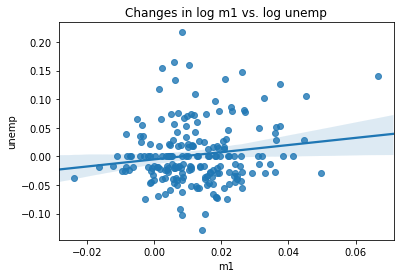

In [72]:
sns.regplot('m1', 'unemp', data=trans_data)
plt.title('Changes in log %s vs. log %s' %('m1', 'unemp'))

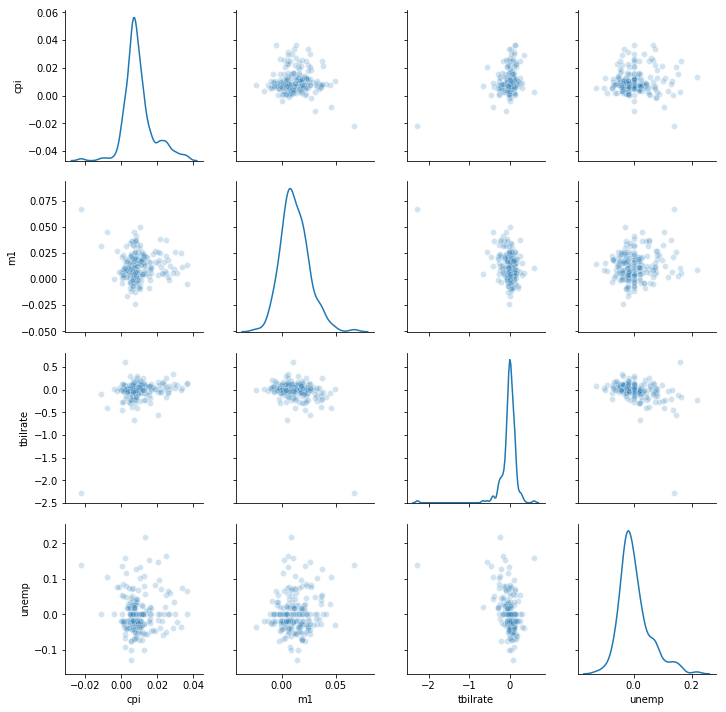

In [73]:
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha':0.2})

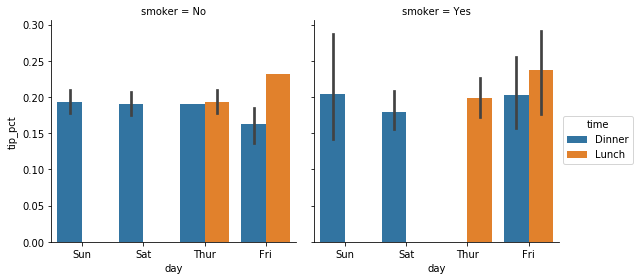

In [74]:
sns.factorplot(x='day', y='tip_pct', hue='time', col='smoker',
 .....: kind='bar', data=tips[tips.tip_pct < 1])

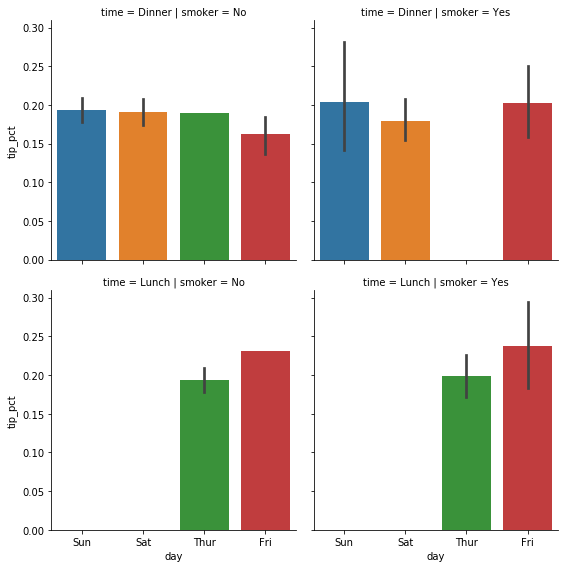

In [75]:
sns.factorplot(x='day', y='tip_pct', row='time', col='smoker', kind='bar', data=tips[tips.tip_pct < 1])

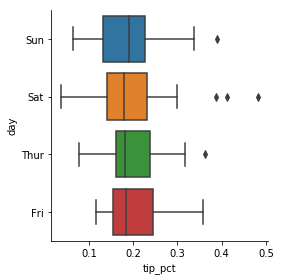

In [76]:
sns.factorplot(x='tip_pct', y='day', kind='box',
 .....: data=tips[tips.tip_pct < 0.5])